In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
import xarray as xr
import cmocean
from math import radians, cos, sin, asin, sqrt
import pylab as pl

In [2]:
i=0
varname='DYNVARS'
pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
pathw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        
dsw  = xr.open_dataset(pathw)
dsn = xr.open_dataset(pathn)

Ww=dsw.WVEL[0,55,:,:].values
Wn=dsn.WVEL[0,55,:,:].values
time=dsw.time.values.astype(int)
TIMEvel=time*1e-9


i2=2
varname='DYNVARS'
pathn2='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
pathw2='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
        
dsw2  = xr.open_dataset(pathw2)
dsn2 = xr.open_dataset(pathn2)

Ww2=dsw2.WVEL[0,55,:,:].values
Wn2=dsn2.WVEL[0,55,:,:].values
time2=dsw2.time.values.astype(int)
TIMEvel2=time2*1e-9

i2=6
varname='DYNVARS'
pathn3='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
pathw3='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i2)+'_'+ str(3+i2) +'.nc'
        
dsw3  = xr.open_dataset(pathw3)
dsn3 = xr.open_dataset(pathn3)

Ww3=dsw3.WVEL[0,55,:,:].values
Wn3=dsn3.WVEL[0,55,:,:].values
time3=dsw3.time.values.astype(int)
TIMEvel3=time3*1e-9



In [3]:
pathETA='/media/amelia/Trillian/SVB/ETA.nc'
dsETA= xr.open_dataset(pathETA)

In [4]:
etafiltall=dsETA.ETAfiltall.values
LON=dsETA.x.values
LAT=dsETA.y.values
TIME=dsETA.time.values

In [5]:
hFacC = dsn.hFacC.values

hfa = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfa)

In [6]:
depth=dsw.Depth.values

In [9]:
params = {'font.size': 16,
          'figure.figsize': (10, 20),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

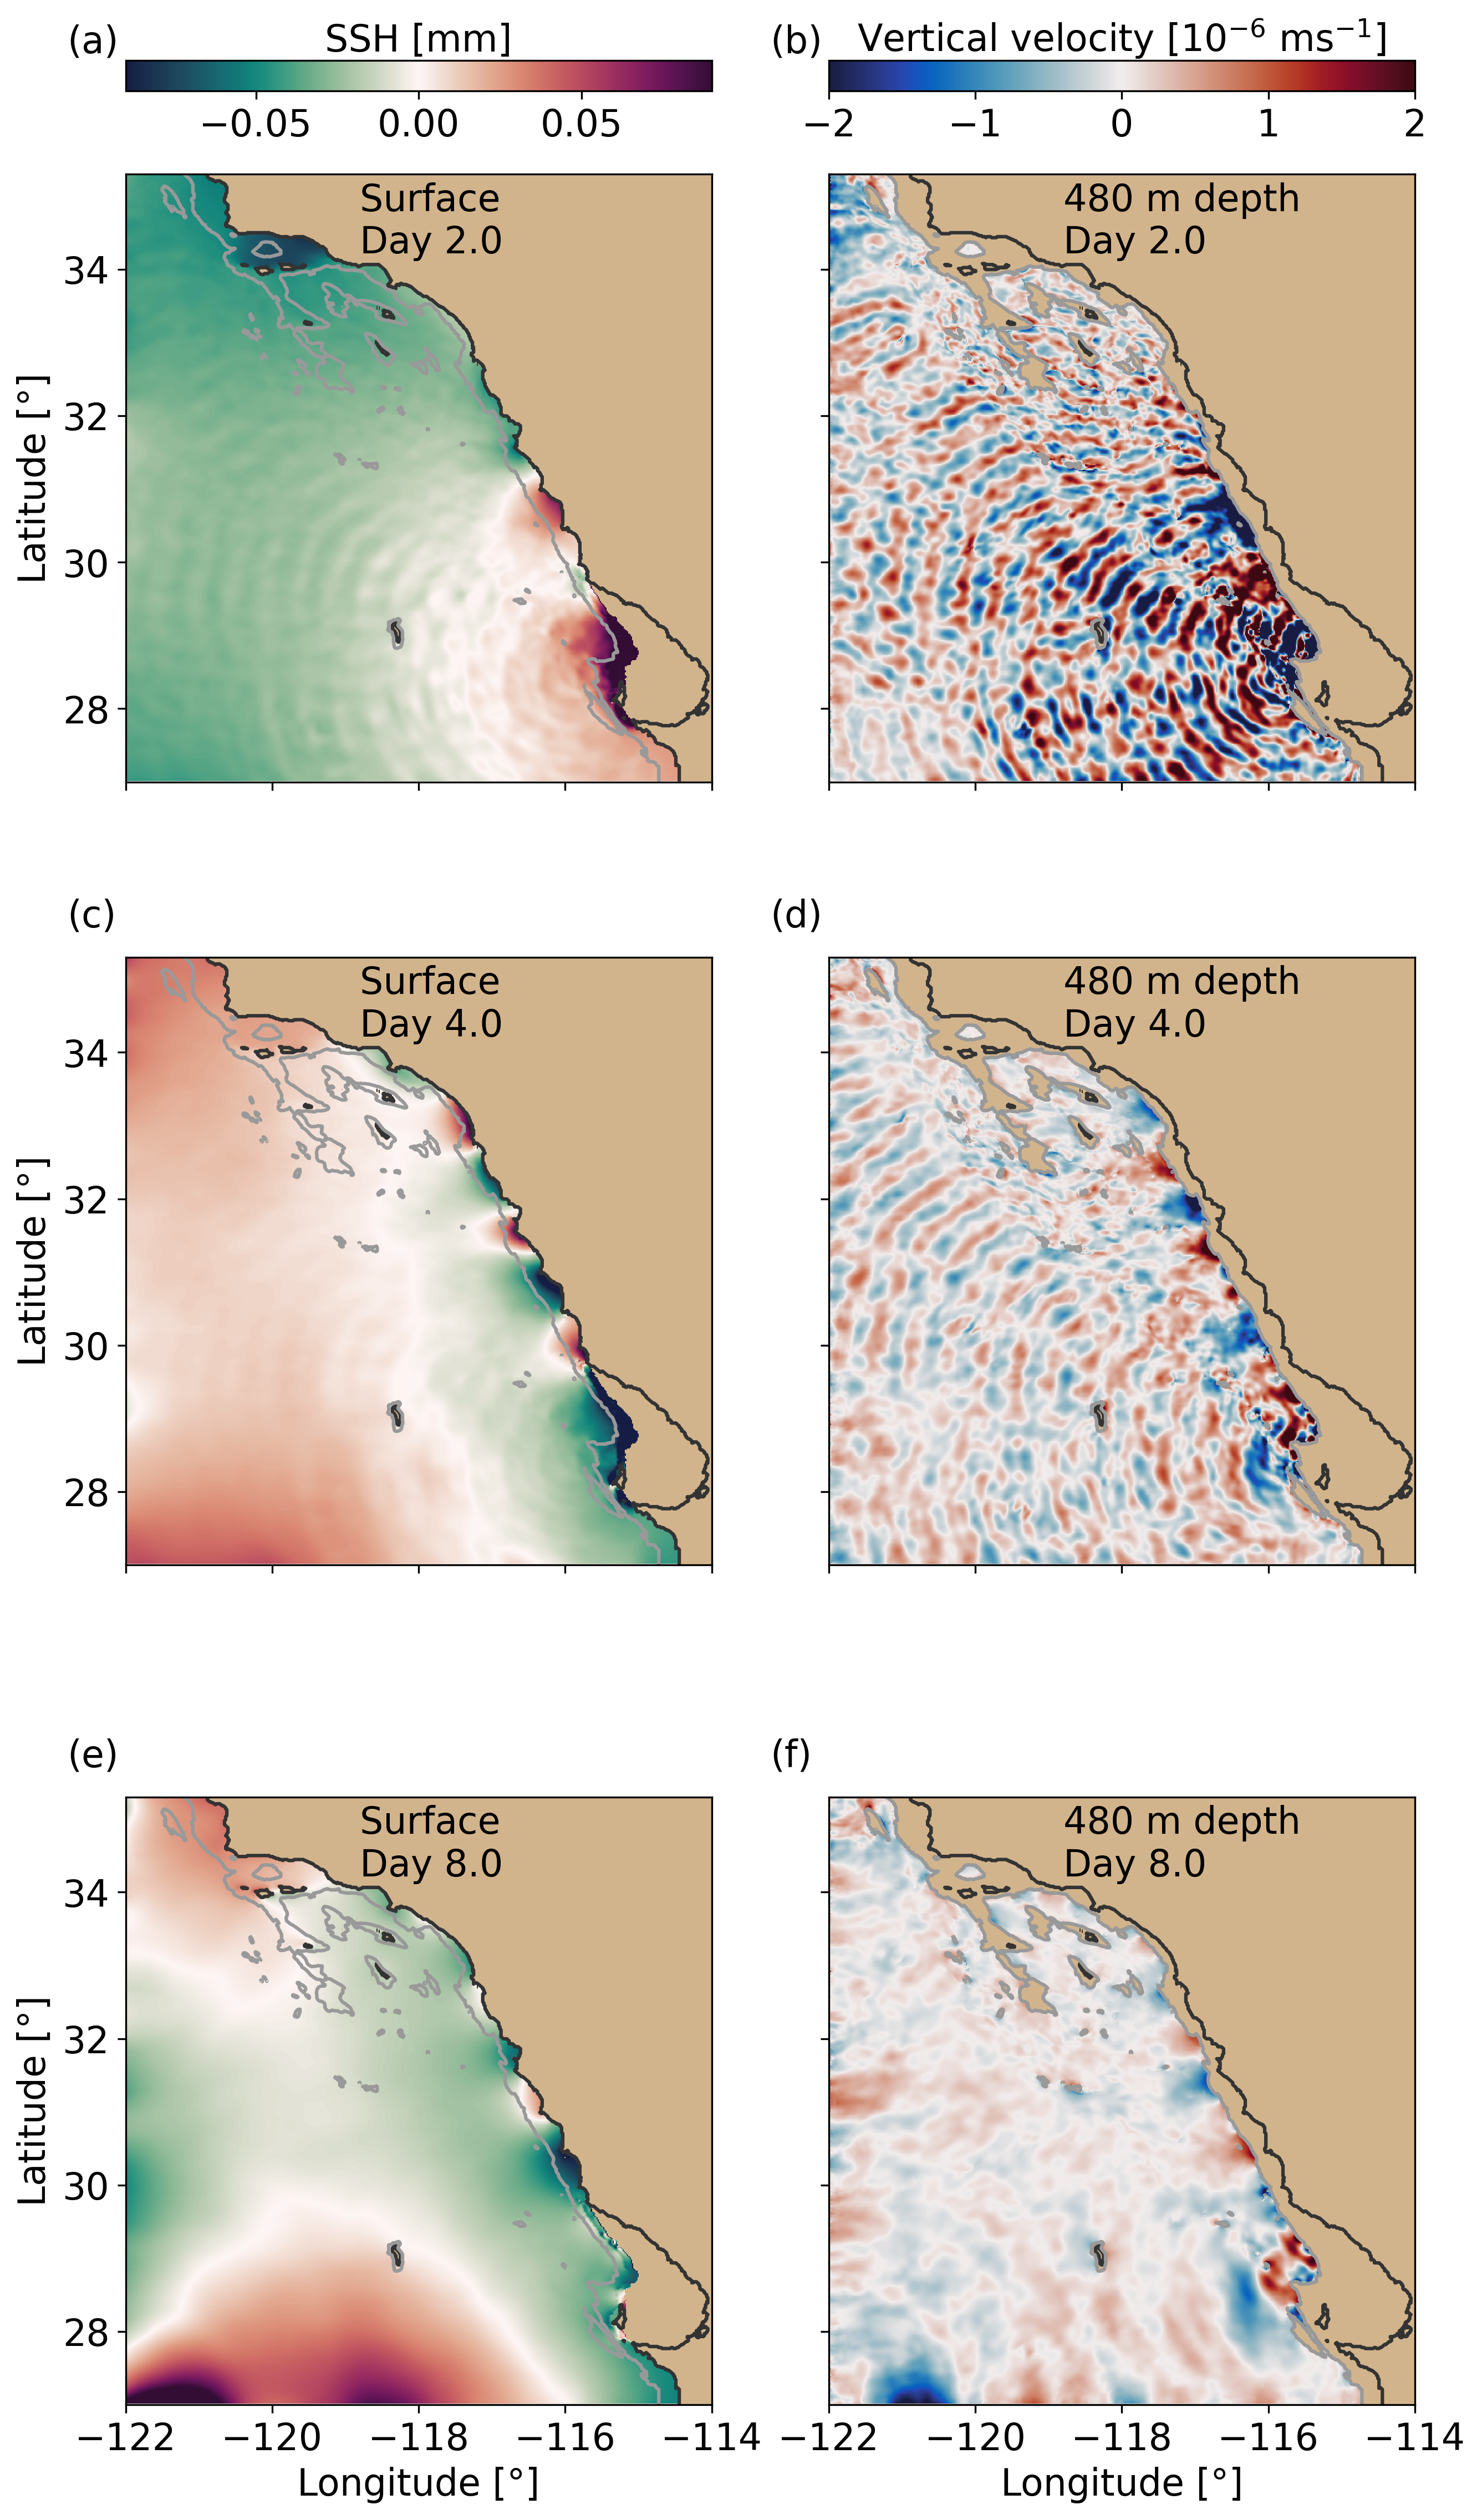

In [10]:
fig = plt.figure()
gs = GridSpec(nrows=3, ncols=2,hspace=0.01)

vmin=-0.009*10
vmax=0.009*10
ind=np.where(TIME==TIMEvel[0])[0][0]
ind2=np.where(TIME==TIMEvel2[0])[0][0]
ind3=np.where(TIME==TIMEvel3[0])[0][0]


xlab='Longitude [°]'
ylab='Latitude [°]'

ax = fig.add_subplot(gs[0,0]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(etafiltall[ind,:,:]*1000, mask=mask[0,:,:]),cmap=cmocean.cm.curl,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth,  colors=['0.2','0.6'], 
                levels=[0,500])

divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('SSH [mm]')

ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)
ax.set( ylabel=ylab)

ax.text(-0.1,1.2, '(a)', transform=ax.transAxes)
ax.text(0.4,0.87, f'Surface \nDay {TIME[ind]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[1,0]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(etafiltall[ind2,:,:]*1000, mask=mask[0,:,:]),cmap=cmocean.cm.curl,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth,  colors=['0.2','0.6'], 
                levels=[0,500])

ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)
ax.set(ylabel=ylab)
cbar_ax.set_label('SSH [mm]')

ax.text(-0.1,1.05, '(c)', transform=ax.transAxes)
ax.text(0.4,0.87, f'Surface \nDay {TIME[ind2]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[2,0]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(etafiltall[ind3,:,:]*1000, mask=mask[0,:,:]),cmap=cmocean.cm.curl,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth,  colors=['0.2','0.6'], 
                levels=[0,500])


ax.set(xlabel=xlab, ylabel=ylab)
cbar_ax.set_label('SSH [mm]')

ax.text(-0.1,1.05, '(e)', transform=ax.transAxes)
ax.text(0.4,0.87, f'Surface \nDay {TIME[ind3]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)


vmin=-0.000002*1e6
vmax=0.000002*1e6


ax = fig.add_subplot(gs[0,1]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(Ww-Wn, mask=mask[55,:,:])*1e6,cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth, colors=['0.2','0.6'], 
                levels=[0,500])

divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('Vertical velocity [$10^{-6}$ ms$^{-1}$]')

ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) 
ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)

ax.text(0.4,0.87, f'480 m depth \nDay {TIMEvel[0]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')
ax.text(-0.1,1.2, '(b)', transform=ax.transAxes)

ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[1,1]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(Ww2-Wn2, mask=mask[55,:,:])*1e6,cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth, colors=['0.2','0.6'], 
                levels=[0,500])

ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) 
ax.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=False)

ax.text(0.4,0.87, f'480 m depth \nDay {TIMEvel2[0]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')
ax.text(-0.1,1.05, '(d)', transform=ax.transAxes)


ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

ax = fig.add_subplot(gs[2,1]) 

ax.set_facecolor('tan')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(Ww3-Wn3, mask=mask[55,:,:])*1e6,cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth, colors=['0.2','0.6'], 
                levels=[0,500])

ax.tick_params(axis='y',which='both', left=True, right=False, labelleft=False) 
ax.set(xlabel=xlab)

ax.text(0.4,0.87, f'480 m depth \nDay {TIMEvel3[0]/(60*24)}', transform=ax.transAxes,horizontalalignment='left')
ax.text(-0.1,1.05, '(f)', transform=ax.transAxes)


ax.set_xlim(-122,-114) 
ax.set_ylim(27,35.3)
ax.set_aspect(1)

#fig.tight_layout()

## Trapping distance

In [11]:
i=0
varname='DYNVARS'
pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
pathw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        
dsw  = xr.open_dataset(pathw)
dsn = xr.open_dataset(pathn)

Ww=dsw.WVEL[:,55,220,:].values
Wn=dsn.WVEL[:,55,220,:].values
time=dsw.time.values.astype(int)
TIMEvel=time*1e-9

In [12]:
LAT[380]

32.17480000000006

In [13]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

dist_array = np.zeros(len(LON))

p=0
for ii in np.arange(len(LON),0,-1):
    lat1 = LAT[220]
    lon1 = LON[len(LON)-1]
    lat2 = LAT[220]
    lon2 = LON[ii-1]
    p=p+1
    dist_array[p-1]=  haversine(lat1, lon1, lat2, lon2)



In [17]:
params = {'font.size': 16,
          'figure.figsize': (10, 6),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

Text(0, 0.5, 'Distance [km]')

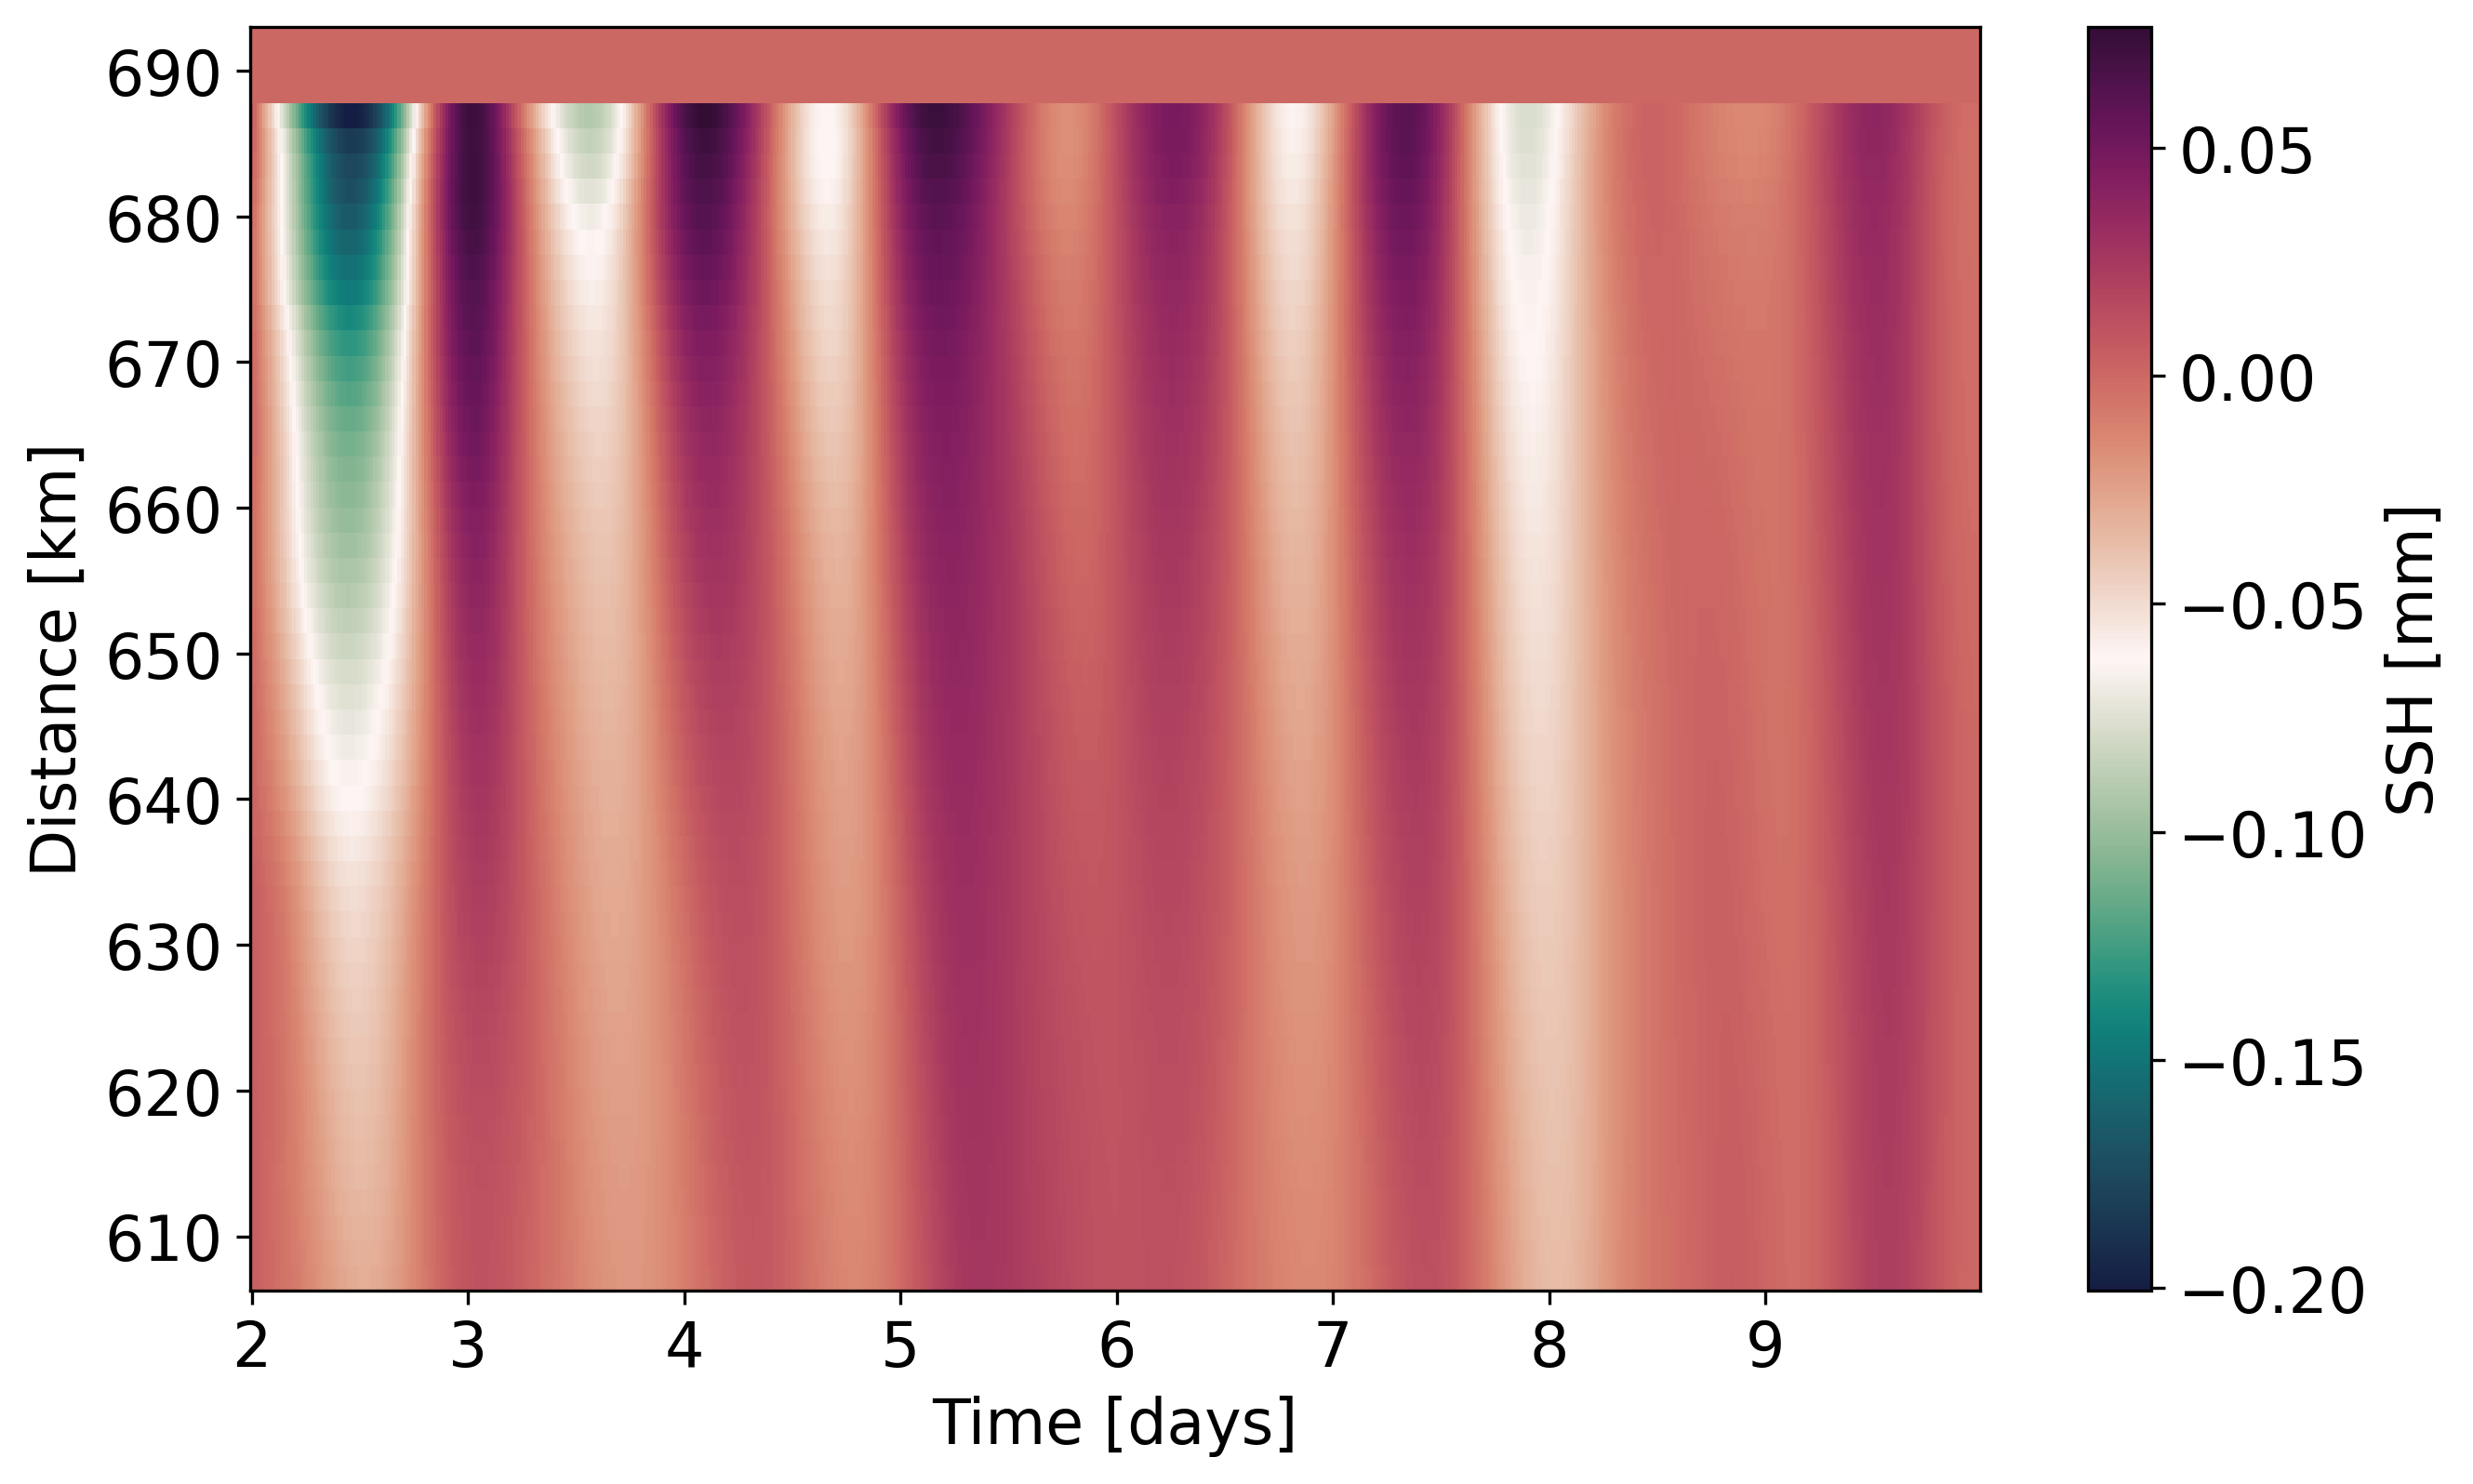

In [25]:
plt.pcolormesh(TIME/(60*24),dist_array[350:400],etafiltall[:,220,350:400].T*1000,cmap=cmocean.cm.curl)
cbar= plt.colorbar()
cbar.set_label('SSH [mm]')
plt.xlabel('Time [days]')
plt.ylabel('Distance [km]')